In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 


In [2]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.shape


(6362620, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
print('Number of fraudulent transactions \t: {}'.format(df['isFraud'].sum()))
print('Number of non-fraudulent transactions\t: {}'.format(len(df[df['isFraud'] == 0])))
print('\nNumber of transactions flagged fraud \t: {}'.format(len(df[df['isFlaggedFraud'] == 1])))
print('Number of transactions flagged non-fraud: {}'.format(len(df[df['isFlaggedFraud'] == 0])))


Number of fraudulent transactions 	: 8213
Number of non-fraudulent transactions	: 6354407

Number of transactions flagged fraud 	: 16
Number of transactions flagged non-fraud: 6362604


In [8]:
#Merchants
X = df[df['nameDest'].str.contains('M')]

X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


There is no information regarding the attribites oldbalanceDest and newbalanceDest

In [9]:
fraud_ratio = df['isFraud'].value_counts()/len(df)
flaggedFraud_ratio = df['isFlaggedFraud'].value_counts()/len(df)

print(f'Fraud ratio \n{fraud_ratio} \n \nFlagged fruad ratio \n{flaggedFraud_ratio}')


Fraud ratio 
isFraud
0    0.998709
1    0.001291
Name: count, dtype: float64 
 
Flagged fruad ratio 
isFlaggedFraud
0    0.999997
1    0.000003
Name: count, dtype: float64


In [10]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [11]:
fraudby_type = df.groupby(['type', 'isFraud']).size().unstack(fill_value=0)
flaggedFraudby_type = df[df['isFlaggedFraud']==1].groupby('type')['isFlaggedFraud'].count()

In [12]:
print(f'Fraud per transaction type: \n{fraudby_type}\nFlagged fraud per transaction type: \n{flaggedFraudby_type}')

Fraud per transaction type: 
isFraud         0     1
type                   
CASH_IN   1399284     0
CASH_OUT  2233384  4116
DEBIT       41432     0
PAYMENT   2151495     0
TRANSFER   528812  4097
Flagged fraud per transaction type: 
type
TRANSFER    16
Name: isFlaggedFraud, dtype: int64


Only Transfers are flagged as fraud 
only cashouts and transfers are fraud

In [13]:
df[df['isFraud']==1].describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,8213.000000,8.213000e+03,8.213000e+03,8.213000e+03,8.213000e+03,8.213000e+03,8213.0,8213.000000
mean,368.413856,1.467967e+06,1.649668e+06,1.923926e+05,5.442496e+05,1.279708e+06,1.0,0.001948
std,216.388690,2.404253e+06,3.547719e+06,1.965666e+06,3.336421e+06,3.908817e+06,0.0,0.044097
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000
25%,181.000000,1.270913e+05,1.258224e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000
50%,367.000000,4.414234e+05,4.389835e+05,0.000000e+00,0.000000e+00,4.676420e+03,1.0,0.000000
75%,558.000000,1.517771e+06,1.517771e+06,0.000000e+00,1.478287e+05,1.058725e+06,1.0,0.000000
max,743.000000,1.000000e+07,5.958504e+07,4.958504e+07,2.362305e+08,2.367265e+08,1.0,1.000000


Transactions that empties funds in one account 

In [14]:
len(df[(df['amount'] == df['oldbalanceOrg'])])


8034

In [15]:
len(df[(df['amount'] == df['oldbalanceOrg']) & (df['isFraud'] == 1)])

8034

So all transactions that empty funds are marked as fraud.
But, there are 8213 fraud transactions in total.
=> Remaining transactions could be outliers?

In [16]:
df_outliers = df[(df['amount'] != df['oldbalanceOrg']) & (df['isFraud'] == 1)]

In [17]:
df_outliers.groupby('type')['type'].count()

type
CASH_OUT     25
TRANSFER    154
Name: type, dtype: int64

In [18]:
df_outliers[df_outliers['type'] == 'CASH_OUT'].describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,25.000000,25.000000,25.000000,25.0000,2.500000e+01,2.500000e+01,25.0,25.0
mean,56.880000,220121.416800,17031.663200,11950.7044,5.806669e+05,1.185674e+06,1.0,0.0
std,78.015127,158136.453984,69138.559766,59753.5220,1.613350e+06,2.341533e+06,0.0,0.0
min,1.000000,23292.300000,0.000000,0.0000,0.000000e+00,4.061122e+04,1.0,0.0
25%,13.000000,95428.320000,0.000000,0.0000,0.000000e+00,2.250277e+05,1.0,0.0
50%,19.000000,181728.110000,0.000000,0.0000,1.139700e+04,4.070058e+05,1.0,0.0
75%,38.000000,314251.580000,0.000000,0.0000,3.989313e+05,6.784196e+05,1.0,0.0
max,231.000000,577418.980000,340830.430000,298767.6100,7.962205e+06,9.291620e+06,1.0,0.0


Seems like most of the fraud cashout outliers are transactions in which Original account has 0 balance before and after the transaction; and Destination account has balance in the order of  after the transaction.

Outlier shows a pattern and thus cannot be ignored.

In [19]:
df_outliers[df_outliers['type'] == 'TRANSFER'].describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,154.000000,1.540000e+02,1.540000e+02,1.540000e+02,1.540000e+02,1.540000e+02,154.0,154.000000
mean,439.097403,9.565122e+06,1.928838e+07,1.006063e+07,2.855618e+04,5.909128e+04,1.0,0.038961
std,213.665941,1.919552e+06,1.081729e+07,1.032873e+07,2.048429e+05,3.562933e+05,0.0,0.194133
min,4.000000,1.231949e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000
25%,271.500000,1.000000e+07,1.227122e+07,2.455224e+06,0.000000e+00,0.000000e+00,1.0,0.000000
50%,425.000000,1.000000e+07,1.595579e+07,6.359678e+06,0.000000e+00,0.000000e+00,1.0,0.000000
75%,646.000000,1.000000e+07,2.370846e+07,1.493847e+07,0.000000e+00,0.000000e+00,1.0,0.000000
max,741.000000,1.000000e+07,5.958504e+07,4.958504e+07,2.122337e+06,3.217684e+06,1.0,1.000000


Flagged fraud
An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

Analyzing flagged fraud data

In [20]:
df[df['isFlaggedFraud'] == 1].describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,16.000000,1.600000e+01,1.600000e+01,1.600000e+01,16.0,16.0,16.0,16.0
mean,537.562500,4.861598e+06,7.817869e+06,7.817869e+06,0.0,0.0,1.0,1.0
std,181.895196,3.572499e+06,6.972669e+06,6.972669e+06,0.0,0.0,0.0,0.0
min,212.000000,3.538742e+05,3.538742e+05,3.538742e+05,0.0,0.0,1.0,1.0
25%,415.500000,2.242749e+06,3.013980e+06,3.013980e+06,0.0,0.0,1.0,1.0
50%,601.500000,4.234245e+06,4.923043e+06,4.923043e+06,0.0,0.0,1.0,1.0
75%,678.750000,7.883451e+06,1.212835e+07,1.212835e+07,0.0,0.0,1.0,1.0
max,741.000000,1.000000e+07,1.958504e+07,1.958504e+07,0.0,0.0,1.0,1.0


In [21]:
len(df[ (df['oldbalanceOrg'] == df['newbalanceOrig']) \
    &   (df['oldbalanceDest'] == df['newbalanceDest']) \
    &   (df['amount']>200.000) \
    &   (df['type'] == 'TRANSFER') ])

21

In [22]:
len(df[df['isFlaggedFraud'] == 1])

16

21 - 16 = 5 missing values or outliers in isFlaggedFraud.

In [23]:
dff_outliers = df[ (df['oldbalanceOrg'] == df['newbalanceOrig']) \
        & (df['oldbalanceDest'] == df['newbalanceDest']) \
        & (df['amount']>200.000) \
        & (df['type'] == 'TRANSFER') \
        & (df['isFlaggedFraud'] == 0)]
dff_outliers.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,5.00000,5.000000,5.0,5.0,5.0,5.0,5.0,5.0
mean,16.80000,237475.474000,0.0,0.0,0.0,0.0,0.0,0.0
std,16.11521,161578.156092,0.0,0.0,0.0,0.0,0.0,0.0
min,1.00000,18931.590000,0.0,0.0,0.0,0.0,0.0,0.0
25%,12.00000,133711.480000,0.0,0.0,0.0,0.0,0.0,0.0
50%,12.00000,271161.740000,0.0,0.0,0.0,0.0,0.0,0.0
75%,15.00000,342317.150000,0.0,0.0,0.0,0.0,0.0,0.0
max,44.00000,421255.410000,0.0,0.0,0.0,0.0,0.0,0.0


Failed transfer attempts from empty accounts are not flagged as fraud.
Again, the outliers has a pattern and must be retained.

***Merchant Transactions***

Given, there is not information for customers that start with M (Merchants).

Finding transactions initiated by merchants



In [24]:
df[df['nameOrig'].str.startswith('M')].describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


No merchants initiated transactions.

In [25]:
df[df['nameDest'].str.startswith('M')].describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,2.151495e+06,2.151495e+06,2.151495e+06,2.151495e+06,2151495.0,2151495.0,2151495.0,2151495.0
mean,2.443782e+02,1.305760e+04,6.821683e+04,6.183789e+04,0.0,0.0,0.0,0.0
std,1.426951e+02,1.255645e+04,1.989911e+05,1.969915e+05,0.0,0.0,0.0,0.0
min,1.000000e+00,2.000000e-02,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
25%,1.560000e+02,4.383820e+03,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
50%,2.490000e+02,9.482190e+03,1.053000e+04,0.000000e+00,0.0,0.0,0.0,0.0
75%,3.350000e+02,1.756122e+04,6.088300e+04,4.965413e+04,0.0,0.0,0.0,0.0
max,7.180000e+02,2.386380e+05,4.368662e+07,4.367380e+07,0.0,0.0,0.0,0.0


2151495 transactions were destined towards merchant accounts.
However, oldbalanceDest, newbalanceDest, isFraud, isFlaggedFraud - are all 0; i.e these are the missing data.

In [26]:
df_missing = df[df['nameDest'].str.startswith('M')]
df_missing['type'].unique()

array(['PAYMENT'], dtype=object)

***Data Preprocessing***

Fix Missing Data 

Interpolating oldbalance and updating new balance with payment

In [27]:
import numpy as np
df.loc[df['nameDest'].str.startswith('M'), ['oldbalanceDest']] == np.NaN
print('{} rows updated with NaN'.format(df['oldbalanceDest'].isnull().sum()))

0 rows updated with NaN


In [28]:
df.infer_objects(copy=False)

df.interpolate() 

C:\Users\91783\AppData\Local\Temp\ipykernel_16056\4238005834.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [29]:
df[df['oldbalanceDest'].isnull()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [30]:
df.loc[df['oldbalanceDest'].isnull(), 'oldbalanceDest'] = 0

In [31]:
df.isnull().values.any()

False

In [32]:
df[(df['type'] == 'PAYMENT') & (df.nameDest.str.get(0) != 'M')]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


 There are no payments that doesn't involve Merchants.
So, let's use a general update criteria for updating newbalanceDest.


In [33]:
newbalanceDest = df.loc[df.nameDest.str.get(0) == 'M', 'oldbalanceDest'] + df.loc[df.nameDest.str.get(0) == 'M','amount']

In [34]:
df.loc[df['nameDest'].str.get(0) == 'M', ['newbalanceDest']] = newbalanceDest

In [35]:
len(df[(df['nameDest'].str.get(0) == 'M') & (df['amount'] == df['oldbalanceOrg'])])

0

No transactions to merchants try to empty funds in Original account.
Therefore, None of them need to be marked as isFraud.
So we have fixed all missing data.

However, this means fixing missing data did not contribute to the classification goal. Still, only transaction types CASH_OUT and TRANSFER contribute to Fraud classification.

So, it may be safe to ignore other transaction types.
(Two possible models - one that ignores other transaction types and one that doesn't ignore other transaction types.)

In [36]:
df[df['nameDest'].str.get(0) == 'M'].describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,2.151495e+06,2.151495e+06,2.151495e+06,2.151495e+06,2151495.0,2.151495e+06,2151495.0,2151495.0
mean,2.443782e+02,1.305760e+04,6.821683e+04,6.183789e+04,0.0,1.305760e+04,0.0,0.0
std,1.426951e+02,1.255645e+04,1.989911e+05,1.969915e+05,0.0,1.255645e+04,0.0,0.0
min,1.000000e+00,2.000000e-02,0.000000e+00,0.000000e+00,0.0,2.000000e-02,0.0,0.0
25%,1.560000e+02,4.383820e+03,0.000000e+00,0.000000e+00,0.0,4.383820e+03,0.0,0.0
50%,2.490000e+02,9.482190e+03,1.053000e+04,0.000000e+00,0.0,9.482190e+03,0.0,0.0
75%,3.350000e+02,1.756122e+04,6.088300e+04,4.965413e+04,0.0,1.756122e+04,0.0,0.0
max,7.180000e+02,2.386380e+05,4.368662e+07,4.367380e+07,0.0,2.386380e+05,0.0,0.0


In [37]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.229412e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.672669e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,1.174322e+04,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146621e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


***Remove Unwanted***

In [38]:
df = df.drop(['nameOrig', 'nameDest'], axis=1)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 436.9+ MB


***Normalization***

In [40]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.229412e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.672669e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,1.174322e+04,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146621e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [41]:
cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
df['step'] = df['step'] - df['step'].mean()/ (df['step'].std())
df[cols] = df[cols].apply(lambda x: (np.log(x+10)))

In [42]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,-0.710067,PAYMENT,9.195190,12.044412,11.984842,2.302585,9.195190,0,0
1,-0.710067,PAYMENT,7.535980,9.964536,9.872756,2.302585,7.535980,0,0
2,-0.710067,TRANSFER,5.252273,5.252273,2.302585,2.302585,2.302585,1,0
3,-0.710067,CASH_OUT,5.252273,5.252273,2.302585,9.961379,2.302585,1,0
4,-0.710067,PAYMENT,9.365474,10.634990,10.305475,2.302585,9.365474,0,0


In [43]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.416872e+02,1.084252e+01,8.178673e+00,6.672674e+00,8.701227e+00,1.147042e+01,1.290820e-03,2.514687e-06
std,1.423320e+02,1.809876e+00,4.691891e+00,5.229820e+00,5.631153e+00,3.215608e+00,3.590480e-02,1.585775e-03
min,-7.100673e-01,2.302585e+00,2.302585e+00,2.302585e+00,2.302585e+00,2.302585e+00,0.000000e+00,0.000000e+00
25%,1.542899e+02,9.502978e+00,2.302585e+00,2.302585e+00,2.302585e+00,9.371883e+00,0.000000e+00,0.000000e+00
50%,2.372899e+02,1.122367e+01,9.562264e+00,2.302585e+00,1.179596e+01,1.227687e+01,0.000000e+00,0.000000e+00
75%,3.332899e+02,1.224880e+01,1.158362e+01,1.187943e+01,1.375687e+01,1.392160e+01,0.000000e+00,0.000000e+00
max,7.412899e+02,1.834213e+01,1.790292e+01,1.771920e+01,1.969049e+01,1.969094e+01,1.000000e+00,1.000000e+00


let's make df2 that ignores transaction types other than transfers and cash outs

In [44]:
df2 = df[(df['type'].isin(['CASH_OUT', 'TRANSFER']))].copy(deep=True)

In [45]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2770409 entries, 2 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            float64
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 211.4+ MB


In [46]:
df2['step'] = df2['step'] - df2['step'].mean() / (df2['step'].std())

In [47]:
df2.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,-2.406858,TRANSFER,5.252273,5.252273,2.302585,2.302585,2.302585,1,0
3,-2.406858,CASH_OUT,5.252273,5.252273,2.302585,9.961379,2.302585,1,0
15,-2.406858,CASH_OUT,12.342106,9.637893,2.302585,8.535622,10.849792,0,0
19,-2.406858,TRANSFER,12.279882,6.572283,2.302585,10.018378,2.302585,0,0
24,-2.406858,TRANSFER,12.649783,9.291459,2.302585,8.744647,14.815842,0,0


In [48]:
df2.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06
mean,2.386012e+02,1.192809e+01,6.367012e+00,3.169231e+00,1.188522e+01,1.355135e+01,2.964544e-03,5.775321e-06
std,1.416191e+02,1.231621e+00,4.114653e+00,2.662251e+00,4.150795e+00,1.651896e+00,5.436687e-02,2.403183e-03
min,-2.406858e+00,2.302585e+00,2.302585e+00,2.302585e+00,2.302585e+00,2.302585e+00,0.000000e+00,0.000000e+00
25%,1.515931e+02,1.132640e+01,2.302585e+00,2.302585e+00,1.176044e+01,1.269863e+01,0.000000e+00,0.000000e+00
50%,2.325931e+02,1.205100e+01,5.749266e+00,2.302585e+00,1.322802e+01,1.362685e+01,0.000000e+00,0.000000e+00
75%,3.285931e+02,1.263396e+01,1.034197e+01,2.302585e+00,1.436704e+01,1.456797e+01,0.000000e+00,0.000000e+00
max,7.395931e+02,1.834213e+01,1.790292e+01,1.771920e+01,1.969049e+01,1.969094e+01,1.000000e+00,1.000000e+00


**DATA VISUALIZATION**

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

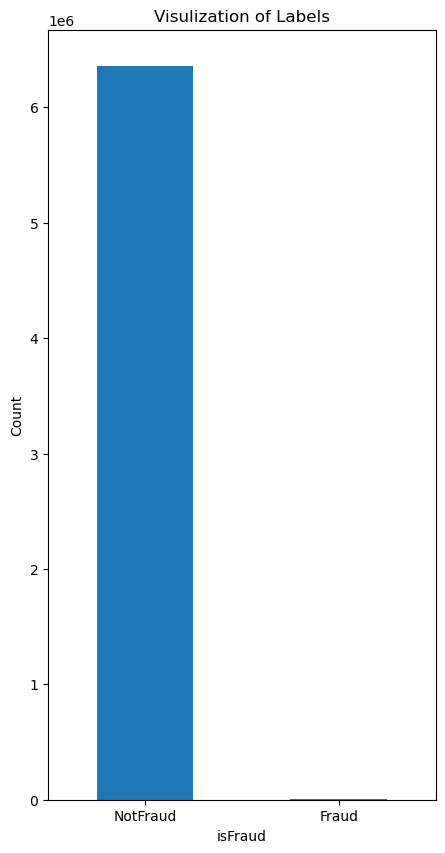

In [50]:
plt.figure(figsize=(5, 10))
labels = ["NotFraud", "Fraud"]
count_classes = df.value_counts(df['isFraud'], sort=True)
count_classes.plot(kind = "bar", rot=0)
plt.title("Visulization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

Step = maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744(30 days simulation)

C:\Users\91783\AppData\Local\Temp\ipykernel_16056\2910596909.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.step)
C:\Users\91783\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91783\AppData\Local\Temp\ipykernel_16056\2910596909.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or 

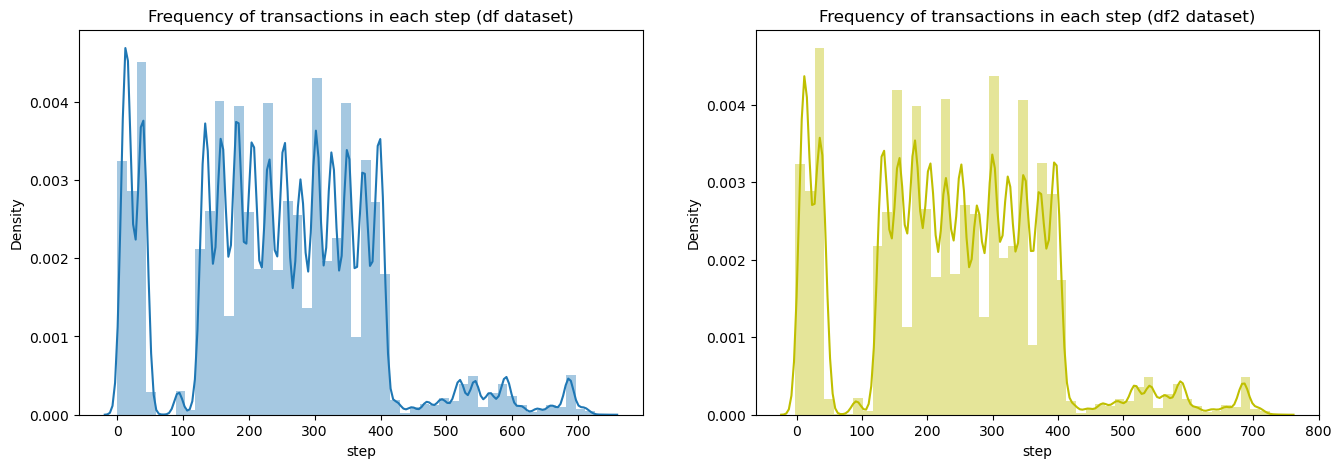

In [51]:
plt.rcParams['figure.figsize'] = (16,5)

plt.subplot(1, 2, 1)
sns.distplot(df.step)
plt.title('Frequency of transactions in each step (df dataset)', fontsize = 12)

plt.subplot(1, 2, 2)
sns.distplot(df2.step, color='y')
plt.title('Frequency of transactions in each step (df2 dataset)', fontsize = 12)

plt.show()

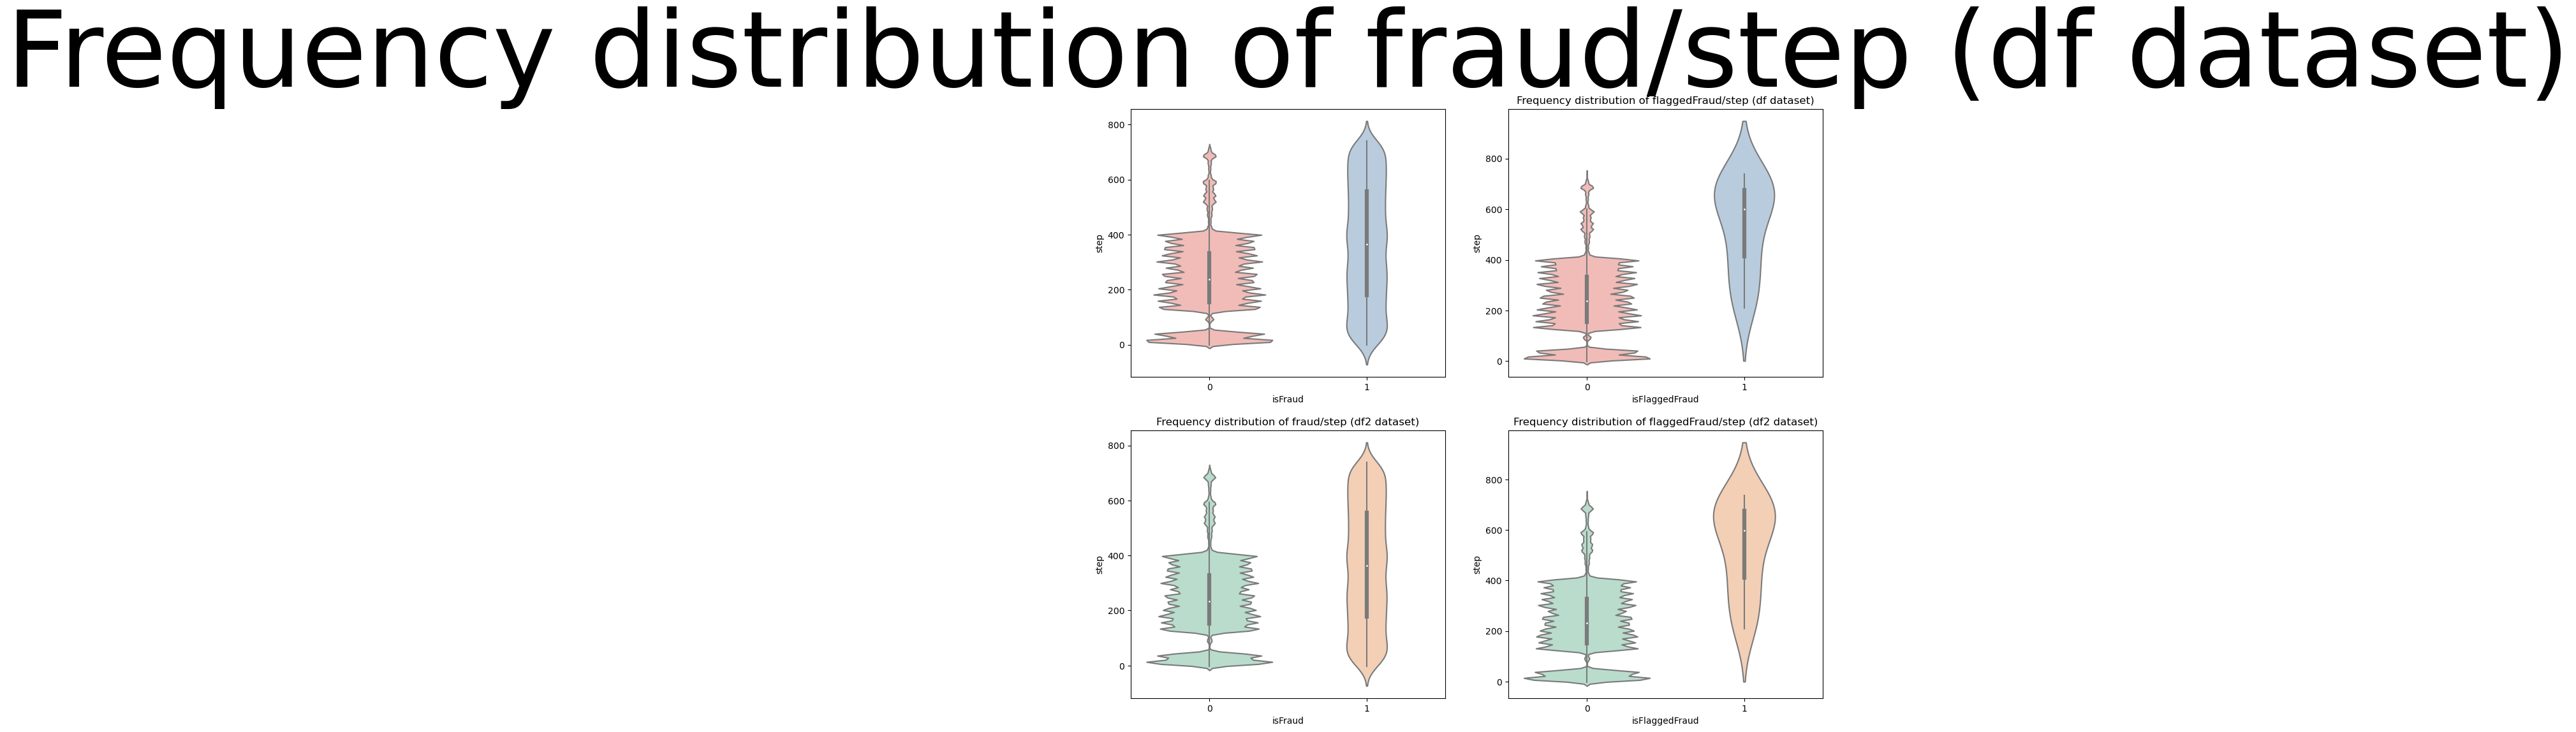

In [52]:
plt.rcParams['figure.figsize'] = (14, 12)

plt.subplot(2, 2, 1)
sns.violinplot(x='isFraud', y='step', data=df, palette='Pastel1')
plt.title('Frequency distribution of fraud/step (df dataset)', fontsize = 120)

plt.subplot(2, 2, 2)
sns.violinplot(x='isFlaggedFraud',y='step',data=df, palette='Pastel1')
plt.title('Frequency distribution of flaggedFraud/step (df dataset)', fontsize = 12)

plt.subplot(2, 2, 3)
sns.violinplot(x='isFraud',y='step',data=df2, palette='Pastel2')
plt.title('Frequency distribution of fraud/step (df2 dataset)', fontsize = 12)

plt.subplot(2, 2, 4)
sns.violinplot(x='isFlaggedFraud',y='step',data=df2, palette='Pastel2')
plt.title('Frequency distribution of flaggedFraud/step (df2 dataset)', fontsize = 12)

plt.show()
          

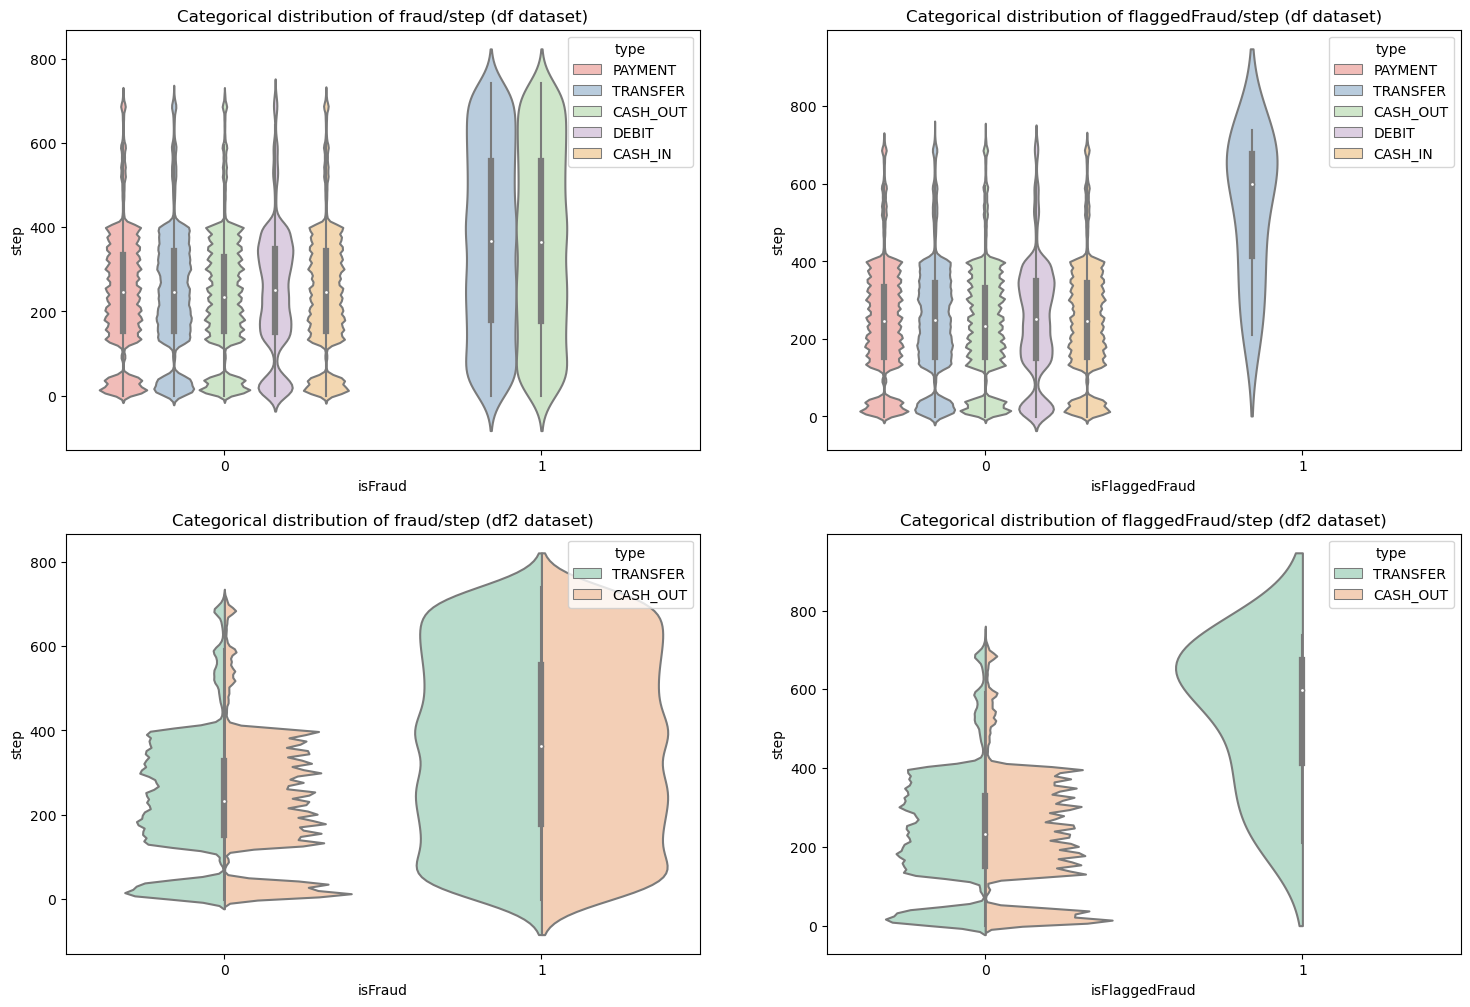

In [53]:

plt.rcParams['figure.figsize'] =(18, 12)

plt.subplot(2, 2, 1)
sns.violinplot(x='isFraud',y='step',data=df, hue='type', palette='Pastel1')
plt.title('Categorical distribution of fraud/step (df dataset)', fontsize = 12)

plt.subplot(2, 2, 2)
sns.violinplot(x='isFlaggedFraud',y='step',data=df, hue='type', palette='Pastel1')
plt.title('Categorical distribution of flaggedFraud/step (df dataset)', fontsize = 12)

plt.subplot(2, 2, 3)
sns.violinplot(x='isFraud',y='step',data=df2, hue='type', split=True, palette='Pastel2')
plt.title('Categorical distribution of fraud/step (df2 dataset)', fontsize = 12)

plt.subplot(2, 2, 4)
sns.violinplot(x='isFlaggedFraud',y='step',data=df2, hue='type', split=True, palette='Pastel2')
plt.title('Categorical distribution of flaggedFraud/step (df2 dataset)')

plt.show()

Both transfer and cashout contribute almost equally towards fruad.
df2 has better captured the distribution of transactions that ocont

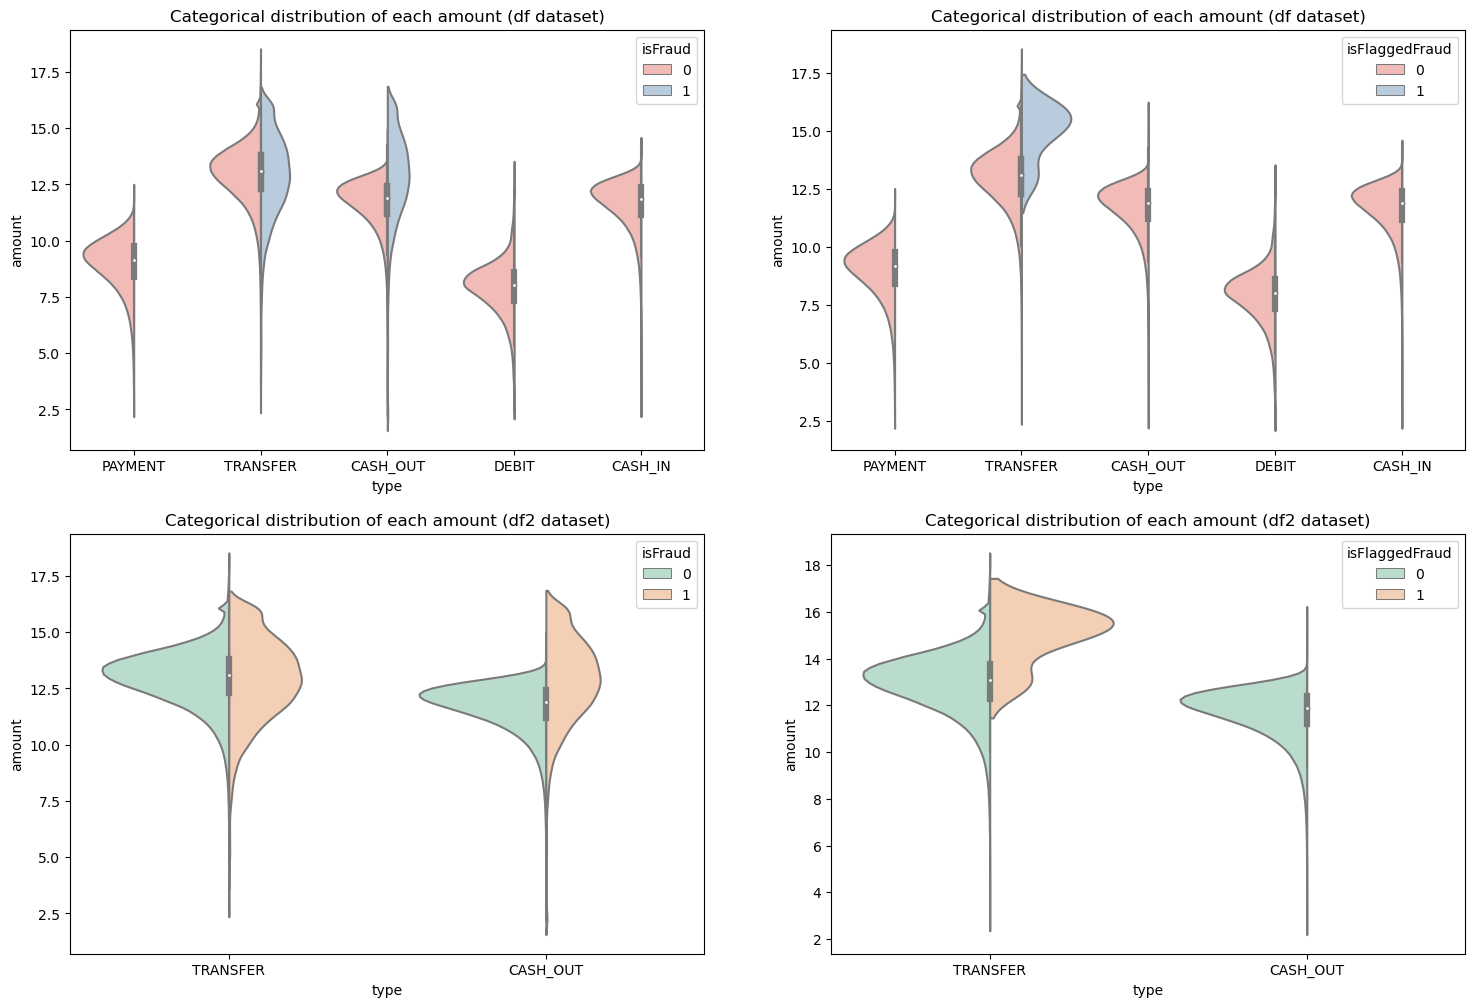

In [54]:
plt.rcParams['figure.figsize'] = (18, 12)

plt.subplot(2, 2, 1)
sns.violinplot(x = 'type', y = 'amount', data=df, hue='isFraud', split=True, palette='Pastel1')
plt.title('Categorical distribution of each amount (df dataset)', fontsize = 12)

plt.subplot(2, 2, 2)
sns.violinplot(x = 'type', y = 'amount', data=df, hue='isFlaggedFraud', split=True, palette='Pastel1')
plt.title('Categorical distribution of each amount (df dataset)', fontsize = 12)

plt.subplot(2, 2, 3)
sns.violinplot(x = 'type', y = 'amount', data=df2, hue='isFraud', split=True, palette='Pastel2')
plt.title('Categorical distribution of each amount (df2 dataset)', fontsize = 12)

plt.subplot(2, 2, 4)
sns.violinplot(x = 'type', y = 'amount', data=df2, hue='isFlaggedFraud', split=True, palette='Pastel2')
plt.title('Categorical distribution of each amount (df2 dataset)', fontsize = 12)

plt.show()

***FEATURE ENGINEERING***

oldbalance, newbalance and amount are interdependent variables. So, we can combine them into a single variable.

In [55]:
df['diffOrg'] = df['oldbalanceOrg'] - df['newbalanceOrig'] + df['amount']
df['diffDest'] = df['oldbalanceDest'] - df['newbalanceDest'] + df['amount']

df2['diffOrg'] = df2['oldbalanceOrg'] - df['newbalanceOrig'] + df2['amount']
df2['diffDest'] = df2['oldbalanceDest'] - df2['newbalanceOrig'] + df2['amount']


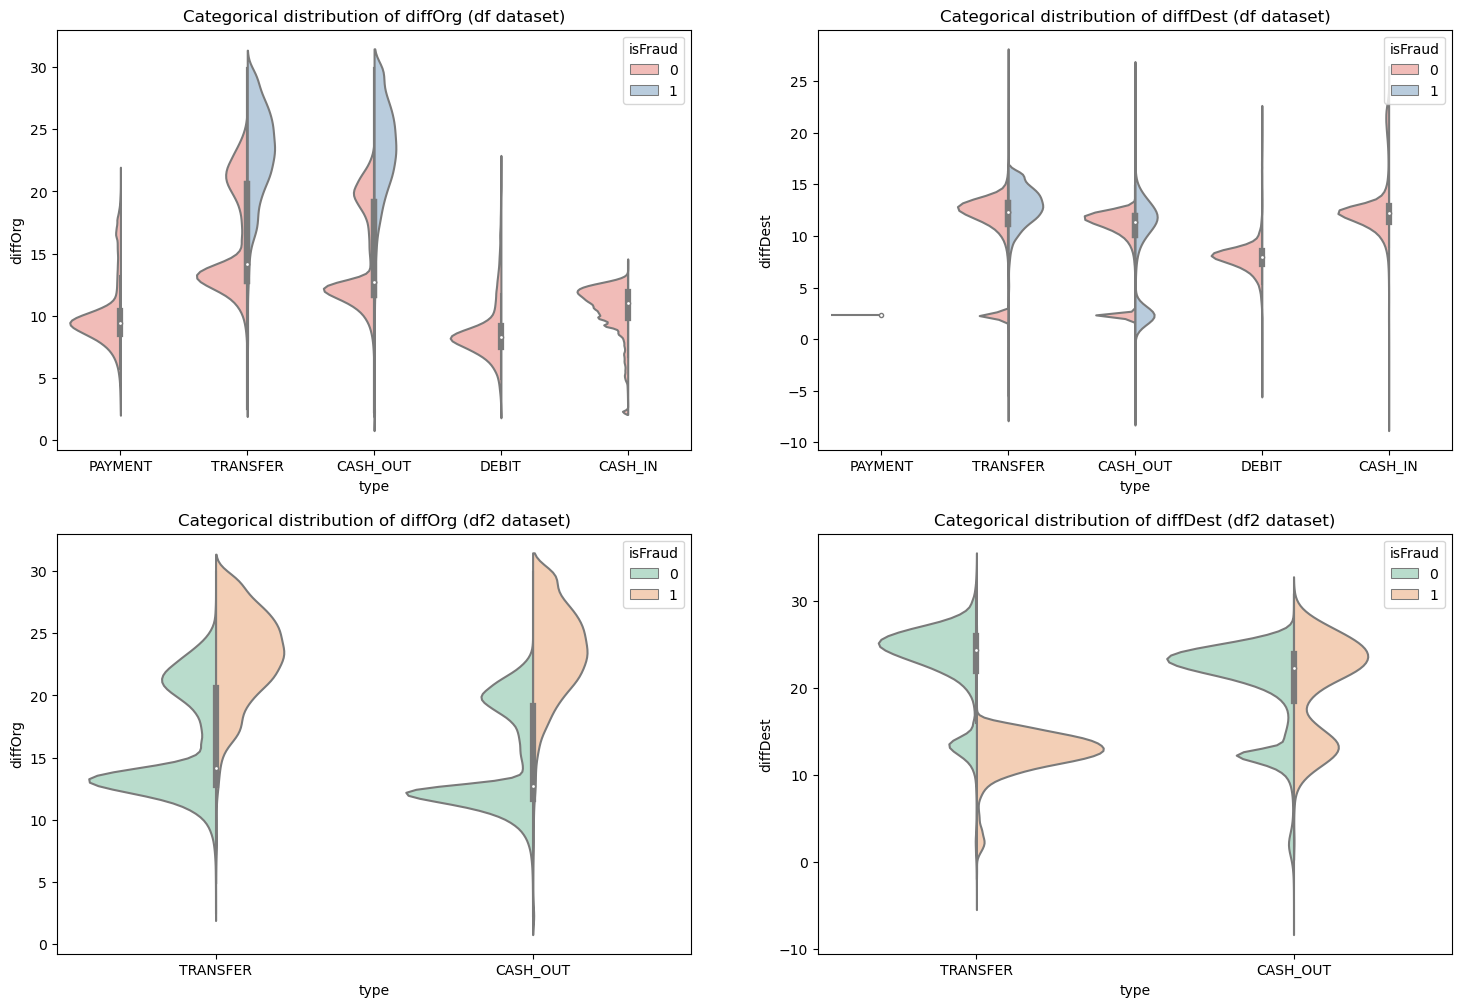

In [56]:
plt.rcParams['figure.figsize'] = (18, 12)

plt.subplot(2, 2, 1)
sns.violinplot(x = 'type', y = 'diffOrg', data=df, hue='isFraud', split=True, palette='Pastel1')
plt.title('Categorical distribution of diffOrg (df dataset)', fontsize = 12)

plt.subplot(2, 2, 2)
sns.violinplot(x = 'type', y = 'diffDest', data=df, hue='isFraud', split=True, palette='Pastel1')
plt.title('Categorical distribution of diffDest (df dataset)', fontsize = 12)

plt.subplot(2, 2, 3)
sns.violinplot(x = 'type', y = 'diffOrg', data=df2, hue='isFraud', split=True, palette='Pastel2')
plt.title('Categorical distribution of diffOrg (df2 dataset)', fontsize = 12)

plt.subplot(2, 2, 4)
sns.violinplot(x = 'type', y = 'diffDest', data=df2, hue='isFraud', split=True, palette='Pastel2')
plt.title('Categorical distribution of diffDest (df2 dataset)', fontsize = 12)

plt.show()

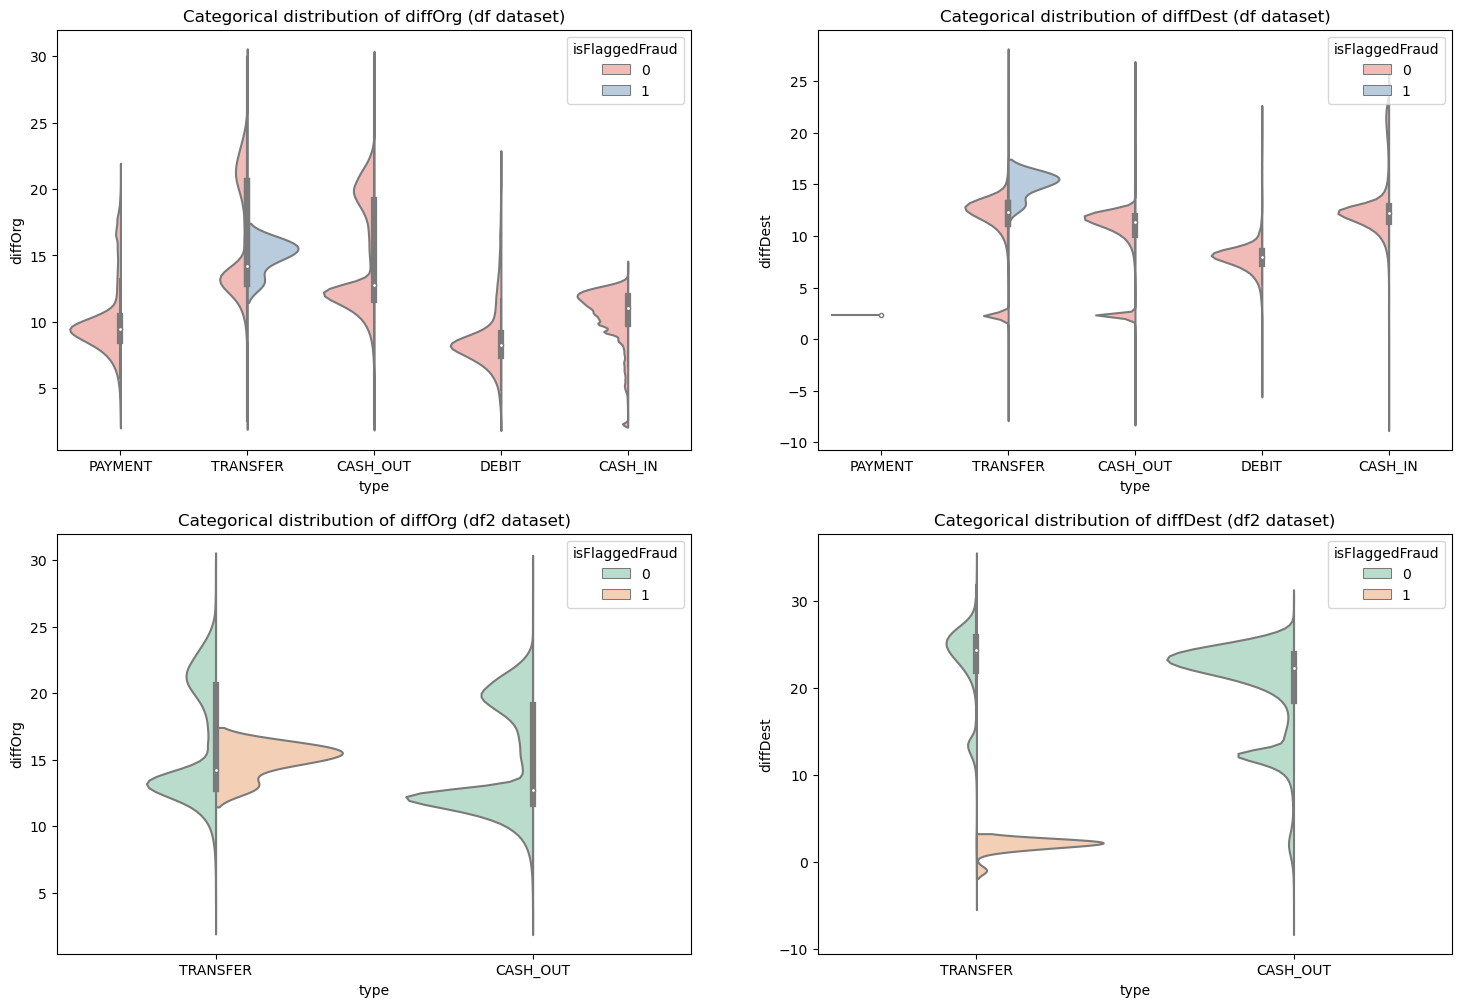

In [57]:
plt.rcParams['figure.figsize'] = (18, 12)

plt.subplot(2, 2, 1)
sns.violinplot(x = 'type', y = 'diffOrg', data=df, hue='isFlaggedFraud', split=True, palette='Pastel1')
plt.title('Categorical distribution of diffOrg (df dataset)', fontsize = 12)

plt.subplot(2, 2, 2)
sns.violinplot(x = 'type', y = 'diffDest', data=df, hue='isFlaggedFraud', split=True, palette='Pastel1')
plt.title('Categorical distribution of diffDest (df dataset)', fontsize = 12)

plt.subplot(2, 2, 3)
sns.violinplot(x = 'type', y = 'diffOrg', data=df2, hue='isFlaggedFraud', split=True, palette='Pastel2')
plt.title('Categorical distribution of diffOrg (df2 dataset)', fontsize = 12)

plt.subplot(2, 2, 4)
sns.violinplot(x = 'type', y = 'diffDest', data=df2, hue='isFlaggedFraud', split=True, palette='Pastel2')
plt.title('Categorical distribution of diffDest (df2 dataset)', fontsize = 12)

plt.show()

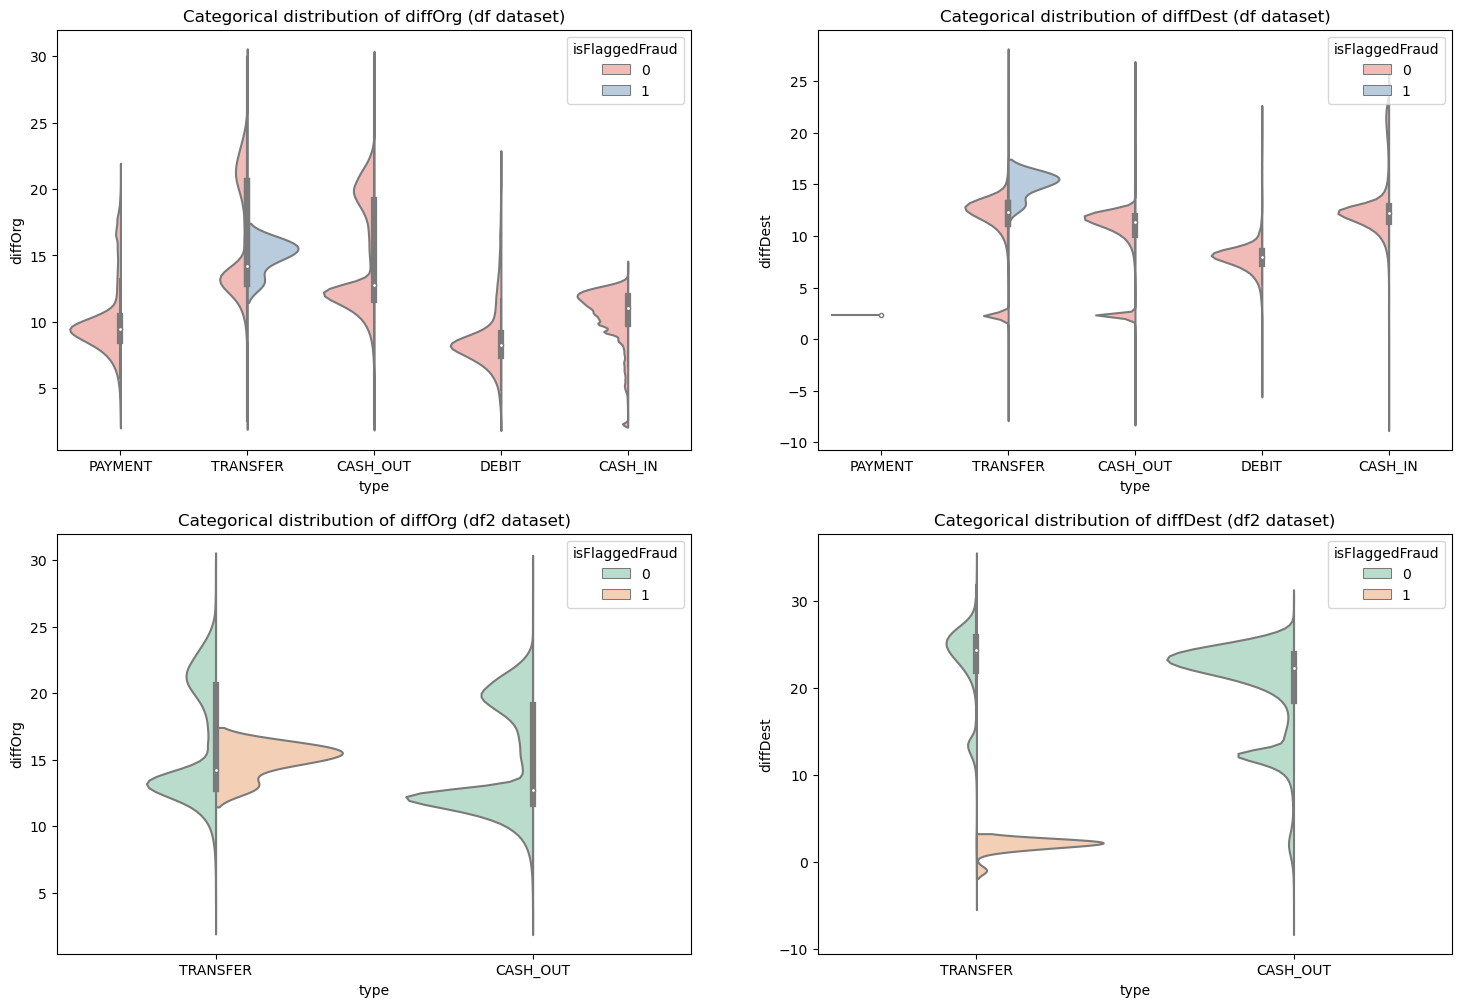

In [58]:
plt.rcParams['figure.figsize'] = (18, 12)

plt.subplot(2, 2, 1)
sns.violinplot(x = 'type', y = 'diffOrg', data=df, hue='isFlaggedFraud', split=True, palette='Pastel1')
plt.title('Categorical distribution of diffOrg (df dataset)', fontsize = 12)

plt.subplot(2, 2, 2)
sns.violinplot(x = 'type', y = 'diffDest', data=df, hue='isFlaggedFraud', split=True, palette='Pastel1')
plt.title('Categorical distribution of diffDest (df dataset)', fontsize = 12)

plt.subplot(2, 2, 3)
sns.violinplot(x = 'type', y = 'diffOrg', data=df2, hue='isFlaggedFraud', split=True, palette='Pastel2')
plt.title('Categorical distribution of diffOrg (df2 dataset)', fontsize = 12)

plt.subplot(2, 2, 4)
sns.violinplot(x = 'type', y = 'diffDest', data=df2, hue='isFlaggedFraud', split=True, palette='Pastel2')
plt.title('Categorical distribution of diffDest (df2 dataset)', fontsize = 12)

plt.show()

**SMOTE oversampling for imbalaced data**

In [59]:
print(f'Fraud ratio \n{fraud_ratio} \n\nFlagged fraud ratio \n{flaggedFraud_ratio}')


Fraud ratio 
isFraud
0    0.998709
1    0.001291
Name: count, dtype: float64 

Flagged fraud ratio 
isFlaggedFraud
0    0.999997
1    0.000003
Name: count, dtype: float64


In [60]:
from imblearn.over_sampling import SMOTE

Preparing datasets 

In [61]:
X = df
Y = df['isFraud']
X = pd.concat([X, pd.get_dummies(X['type'])], axis = 'columns')
X = X.drop(['isFraud', 'type'], axis=1)

X2 = df2
Y2 = df2['isFraud']
X2 = pd.concat([X2, pd.get_dummies(X2['type'])], axis = 'columns')
X2 = X2.drop(['isFraud', 'type'], axis=1)

In [62]:
len(X), len(X2)

(6362620, 2770409)

SMOTE resampling

In [63]:
X, Y = SMOTE().fit_resample(X, Y)
X2, Y2 = SMOTE().fit_resample(X2, Y2)

In [64]:
len(X), len(X2)

(12708814, 5524392)

In [65]:
list(Y).count(1), list(Y2).count(1)

(6354407, 2762196)

In [66]:
list(Y).count(0),list(Y2).count(0)

(6354407, 2762196)

With smote resampling, now our dataset size has almost doubled and has balanced classes.

**Model Training**

In [67]:
from sklearn.model_selection import train_test_split

Set random state for reproducibility

In [68]:
random_state = 55

In [69]:
p = np.random.RandomState(seed=random_state).permutation(len(X))
p2 = np.random.RandomState(seed=random_state).permutation(len(X2))

Random shuffle dataset before splitting 

In [70]:
X, Y = X.iloc[p], Y.iloc[p]
X2, Y2 = X2.iloc[p2], Y2.iloc[p2]

In [71]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = random_state)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = 0.5, random_state = random_state)

x2_train, x2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size = 0.2, random_state = random_state)
x2_val, x2_test, y2_val, y2_test = train_test_split(x2_test, y2_test, test_size = 0.5, random_state = random_state)
     

**Training the classifier**

In [72]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118Note: you may need to restart the kernel to use updated packages.



In [77]:
import torch


In [86]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12372804382701143748
xla_global_id: -1
]


In [91]:
from xgboost import XGBClassifier 

In [93]:
model = XGBClassifier(tree_method="gpu_hist", random_state=random_state)
model2 = XGBClassifier(tree_method="gpu_hist", random_state=random_state)

model.fit(x_train, y_train)
model2.fit(x2_train, y2_train)


y_pred = model.predict(x_train)
y2_pred = model2.predict(x2_train)

C:\Users\91783\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:17:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\91783\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:17:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\context.cc:43: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


XGBoostError: [20:17:54] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:860: Exception in gpu_hist: [20:17:54] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:866: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


model.fit(x_train, y_train)
model2.fit(x2_train, y2_train)

In [83]:
XGBClassifier(random_state=55, tree_method='gpu_hist')     

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=55, ...)

**Evaluation**

In [84]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, f1_score
def evaluate(trainedmodel, x, y):
    y_pred = trainedmodel.predict(x)
    f1     = f1_score(y, y_pred)
    report = classification_report(y, y_pred)
    acc    = accuracy_score(y, y_pred)
    roc_auc= roc_auc_score(y, y_pred)
    eval = {'y_pred': y_pred, 
            'f1_score': f1,
            'accuracy':acc,
            'roc_auc_score': roc_auc
             }

    return eval, report



In [85]:
eval_train, report_train = evaluate(model, x_train, y_train)
eval_val, report_val = evaluate(model, x_val, y_val)

eval2_train, report2_train = evaluate(model2, x2_train, y2_train)
eval2_val, report2_val = evaluate(model2, x2_val, y2_val)

NotFittedError: need to call fit or load_model beforehand

In [ ]:
import pprint
pprint._sorted = lambda x:x
     

In [ ]:
print('Evaluation metrics on training data (for df): \n')
pprint.pprint(eval_train)
print('\n',report_train)

print('\n\nEvaluation metrics on val data (for df): \n')
pprint.pprint(eval_val)
print('\n', report_val)

In [ ]:
print('Evaluate metrics on training data (for df2):\n')
pprint.pprint(eval2_train)
print('\n', report2_train)

pprint('\n\nEvaluation metrics on val data (for df2):\n')
pprint.pprint(eval2_val)
print('\n', report2_val)

In [88]:
eval_test, report_test = evaluate(model, x_test, y_test)
eval2_test, report2_test = evaluate(model2, x2_test, y2_test)

NotFittedError: need to call fit or load_model beforehand

In [89]:
print('Evaluation metrics on test data (for df): \n')
pprint.pprint(eval_test)
print('\n', report_test)

print('\n\nEvaluation metrics on test data (for df2): \n')
pprint.pprint(eval2_test)
print('\n', report2_test)

Evaluation metrics on test data (for df): 



NameError: name 'pprint' is not defined